In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import ciw

In [10]:
import ambulance_game as abg

In [11]:
# Parameters
lambda_a = 0.15
lambda_o = 0.2
mu = 0.1
num_of_servers = 4
threshold = 3
system_capacity = 5
parking_capacity = 2

In [12]:
# Parameters
seed_num = None     
runtime = 1440
warm_up_time = 100
num_of_trials = 50
output_type = "tuple"

In [15]:
# Without Little's Law
def get_mean_waiting_time(pi, states, lambda_a, lambda_o, mu, num_of_servers):
    states_np = np.array(states)
    indices = [index for index, (u,v) in enumerate(states_np) if v > num_of_servers]
    mean_waiting_time = np.sum(((states_np[indices][:,1] - num_of_servers) / (mu * num_of_servers)) * pi[indices])
    return mean_waiting_time

In [16]:
# With Little's Law
def get_mean_blocking_time(pi, states, lambda_a, lambda_o=None, mu=None):
    mean_ambulances = abg.markov.get_mean_ambulances_blocked(pi, states)
    mean_blocking_time = (mean_ambulances / lambda_a)
    return mean_blocking_time

In [17]:
# Parameters
seed_num = None     
runtime = 1440
warm_up_time = 100
num_of_trials = 50
output_type = "tuple"
system_capacity = 60
parking_capacity = 40

In [8]:
def compare_simulation_markov(lambda_a, lambda_o, mu, num_of_servers, threshold, seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity):
    res = abg.simulation.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type, runtime=runtime, system_capacity=system_capacity, parking_capacity=parking_capacity)
    sim_mean_block = np.mean([np.mean(b.blocking_times) for b in res])
    sim_mean_wait = np.mean([np.mean(w.waiting_times) for w in res])

    all_states = abg.markov.build_states(threshold, system_capacity, parking_capacity)
    Q = abg.markov.get_transition_matrix(lambda_a, lambda_o, mu, num_of_servers, threshold, system_capacity, parking_capacity)
    pi = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.lstsq)

    markov_mean_block = get_mean_blocking_time(pi, all_states, lambda_a, mu=mu)
    markov_mean_wait = get_mean_waiting_time(pi, all_states, lambda_a, lambda_o, mu, num_of_servers)
    
    return sim_mean_block, markov_mean_block, sim_mean_wait, markov_mean_wait

# Comparing times

In [12]:
# par = [lambda_a, lambda_o, mu, num_of_servers, threshold]
par_1 = [0.15, 0.2, 0.1, 8, 5]
par_2 = [0.15, 0.1, 0.1, 7, 4]
par_3 = [0.2, 0.3, 0.1, 12, 10]
par_4 = [0.2, 0.3, 0.1, 6, 10]

In [13]:
res1 = compare_simulation_markov(par_1[0], par_1[1], par_1[2], par_1[3], par_1[4], seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
res2 = compare_simulation_markov(par_2[0], par_2[1], par_2[2], par_2[3], par_2[4], seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
res3 = compare_simulation_markov(par_3[0], par_3[1], par_3[2], par_3[3], par_3[4], seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
res4 = compare_simulation_markov(par_4[0], par_4[1], par_4[2], par_4[3], par_4[4], seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)

### Blocking Times

In [14]:
print("Simulation: ", res1[0])
print("Markov: ", res1[1])

Simulation:  2.2287159591338277
Markov:  2.2074715188497813


In [15]:
print("Simulation: ", res2[0])
print("Markov: ", res2[1])

Simulation:  1.7921621129424952
Markov:  1.9635149940302197


In [16]:
print("Simulation: ", res3[0])
print("Markov: ", res3[1])

Simulation:  0.06687021314361345
Markov:  0.08329506080883302


In [17]:
print("Simulation: ", res4[0])
print("Markov: ", res4[1])

Simulation:  5.25386661387465
Markov:  1.600549446300993


### Waiting Times

In [18]:
print("Simulation: ", res1[2])
print("Markov: ", res1[3])

Simulation:  0.004906549441675229
Markov:  0.0029106696002312443


In [19]:
print("Simulation: ", res2[2])
print("Markov: ", res2[3])

Simulation:  0.0003536740505099127
Markov:  0.0003094216972622298


In [20]:
print("Simulation: ", res3[2])
print("Markov: ", res3[3])

Simulation:  0.0015912862234019017
Markov:  0.0006282468473086727


In [21]:
print("Simulation: ", res4[2])
print("Markov: ", res4[3])

Simulation:  3.5874254193834014
Markov:  2.239753694248838


# Plots

In [17]:
# Parameters
lambda_a = 0.15
lambda_o = 0.2
mu = 0.1
num_of_servers = 8
threshold = 5

seed_num = None     
runtime = 14400
warm_up_time = 100
num_of_trials = 50
output_type = "tuple"
system_capacity = 30
parking_capacity = 20

### Varying lambda_a

In [18]:
sim_blocks_a = []
sim_waits_a = []
mar_blocks_a = []
mar_waits_a = []
for prop in np.linspace(0.2, 2, 10):
    ambulance_arrival = prop * lambda_a
    sim_block, mar_block, sim_wait, mar_wait = compare_simulation_markov(ambulance_arrival, lambda_o, mu, num_of_servers, threshold, seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
    
    sim_blocks_a.append(sim_block)
    sim_waits_a.append(sim_wait)
    mar_blocks_a.append(mar_block)
    mar_waits_a.append(mar_wait)

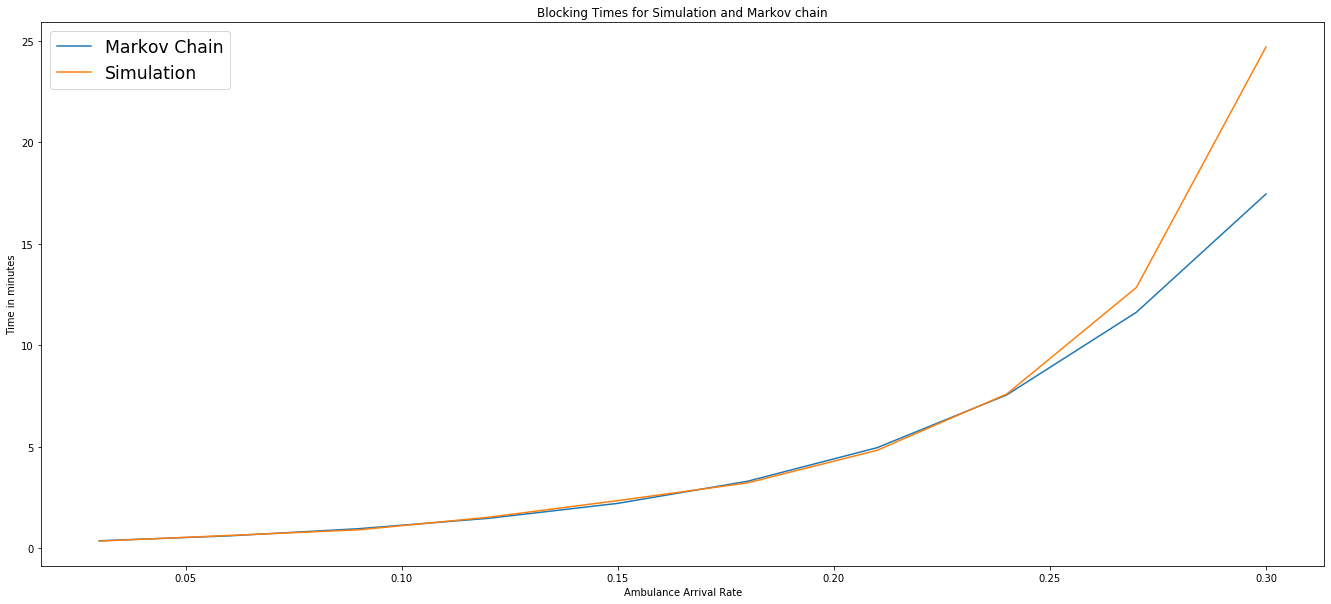

In [19]:
x_axis = [lambda_a*prop for prop in np.linspace(0.2, 2, 10)]
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_blocks_a)
plt.plot(x_axis, sim_blocks_a)
plt.title("Blocking Times for Simulation and Markov chain")
plt.xlabel("Ambulance Arrival Rate")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

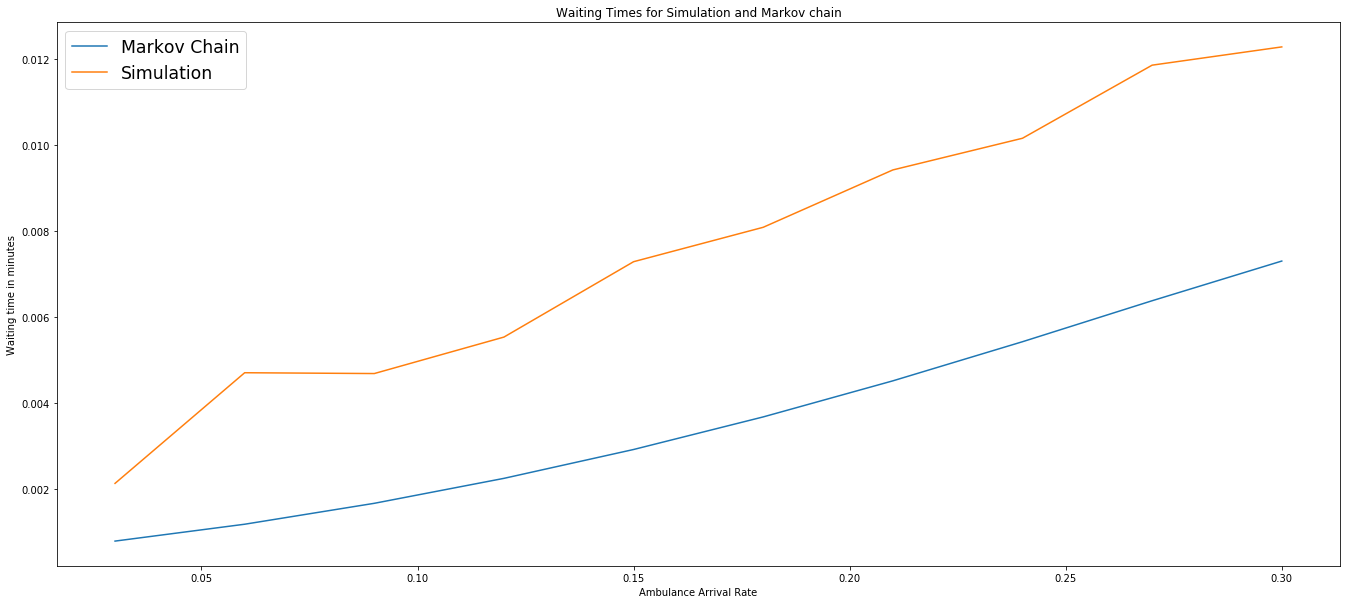

In [20]:
x_axis = [lambda_a*prop for prop in np.linspace(0.2, 2, 10)]
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_waits_a)
plt.plot(x_axis, sim_waits_a)
plt.title("Waiting Times for Simulation and Markov chain")
plt.xlabel("Ambulance Arrival Rate")
plt.ylabel("Waiting time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

### Varying lambda_o

In [21]:
sim_blocks_o = []
sim_waits_o = []
mar_blocks_o = []
mar_waits_o = []
for prop in np.linspace(0.2, 2, 10):
    other_arrival = prop * lambda_o
    sim_block, mar_block, sim_wait, mar_wait = compare_simulation_markov(lambda_a, other_arrival, mu, num_of_servers, threshold, seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
    
    sim_blocks_o.append(sim_block)
    sim_waits_o.append(sim_wait)
    mar_blocks_o.append(mar_block)
    mar_waits_o.append(mar_wait)

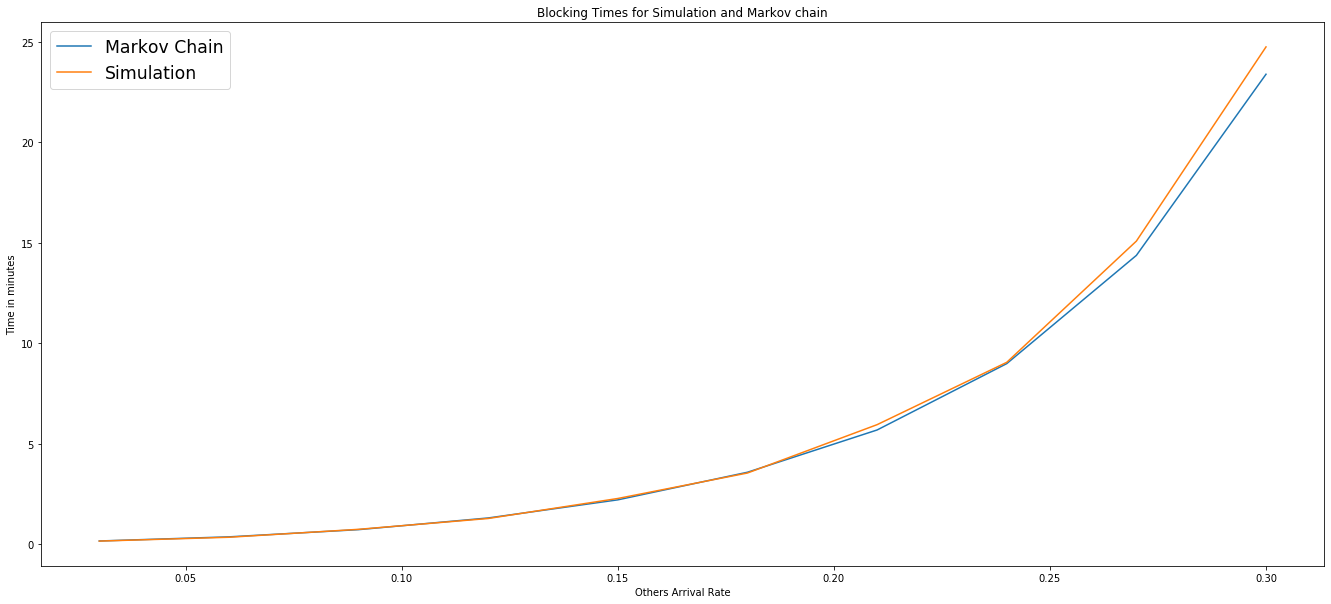

In [22]:
x_axis = [lambda_a*prop for prop in np.linspace(0.2, 2, 10)]
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_blocks_o)
plt.plot(x_axis, sim_blocks_o)
plt.title("Blocking Times for Simulation and Markov chain")
plt.xlabel("Others Arrival Rate")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

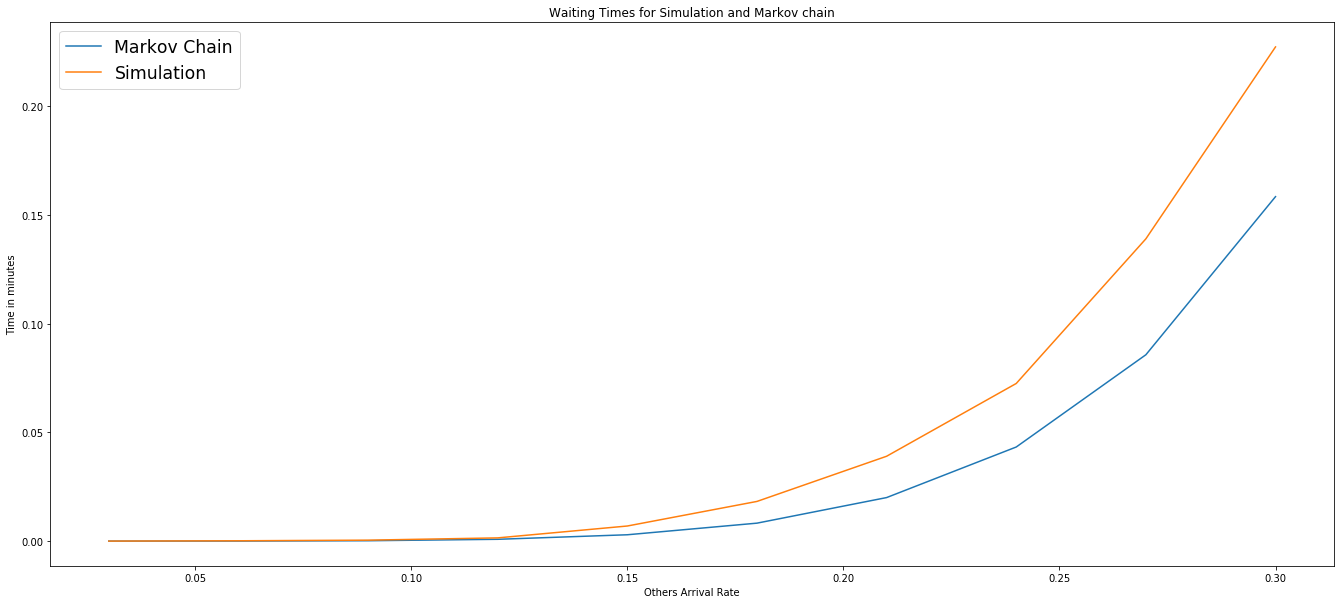

In [23]:
x_axis = [lambda_a*prop for prop in np.linspace(0.2, 2, 10)]
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_waits_o)
plt.plot(x_axis, sim_waits_o)
plt.title("Waiting Times for Simulation and Markov chain")
plt.xlabel("Others Arrival Rate")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

### Varying Servers capacity

In [24]:
sim_blocks_s = []
sim_waits_s = []
mar_blocks_s = []
mar_waits_s = []
for servers_capacity in range(6, 16):
    sim_block, mar_block, sim_wait, mar_wait = compare_simulation_markov(lambda_a, other_arrival, mu, servers_capacity, threshold, seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
    
    sim_blocks_s.append(sim_block)
    sim_waits_s.append(sim_wait)
    mar_blocks_s.append(mar_block)
    mar_waits_s.append(mar_wait)

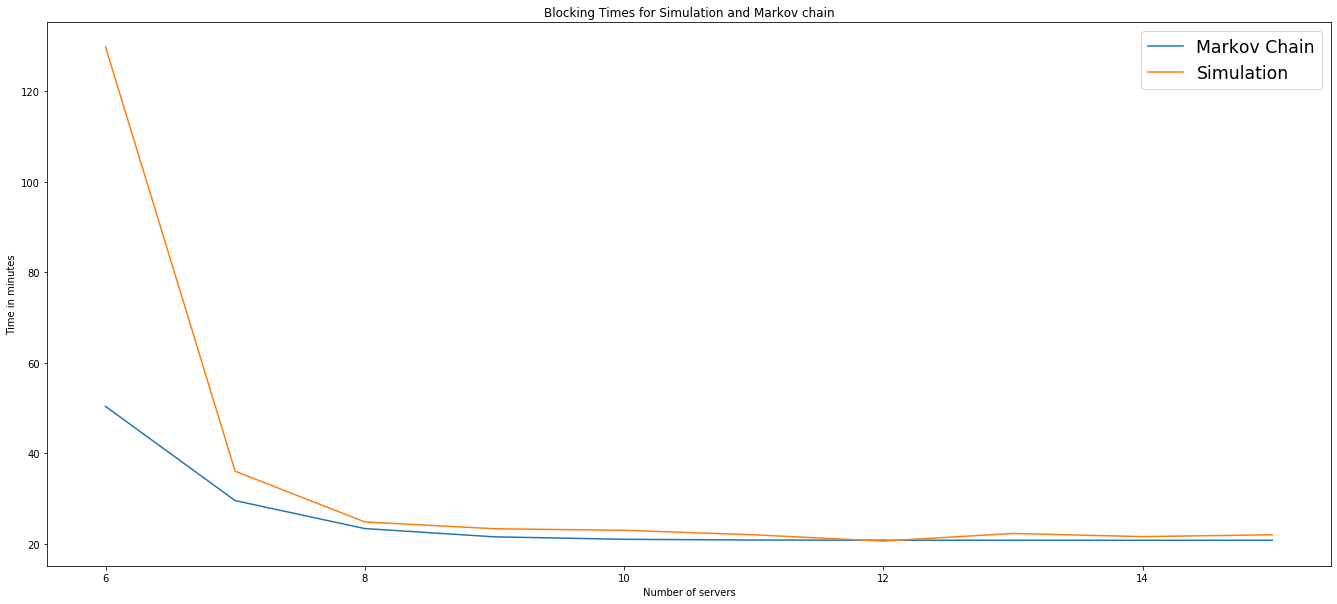

In [25]:
x_axis = np.linspace(6, 15, 10)
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_blocks_s)
plt.plot(x_axis, sim_blocks_s)
plt.title("Blocking Times for Simulation and Markov chain")
plt.xlabel("Number of servers")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

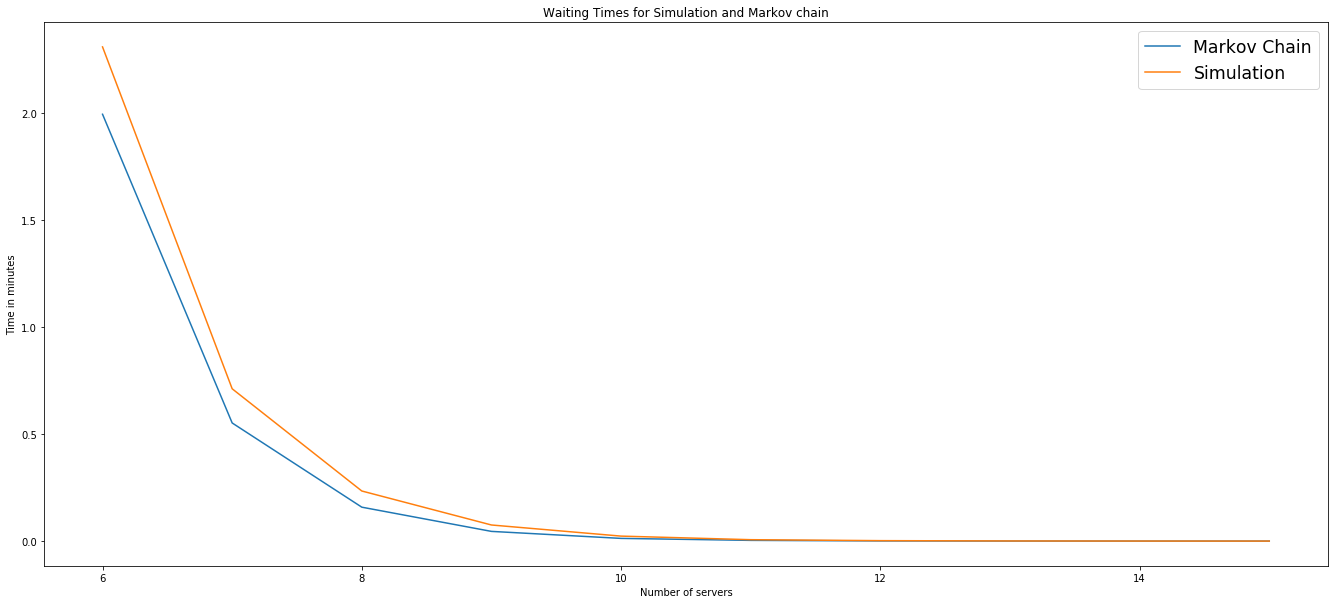

In [26]:
x_axis = np.linspace(6, 15, 10)
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_waits_s)
plt.plot(x_axis, sim_waits_s)
plt.title("Waiting Times for Simulation and Markov chain")
plt.xlabel("Number of servers")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

### Varying Threshold

In [27]:
sim_blocks_s = []
sim_waits_s = []
mar_blocks_s = []
mar_waits_s = []
for thres in range(2, 12):
    sim_block, mar_block, sim_wait, mar_wait = compare_simulation_markov(lambda_a, other_arrival, mu, servers_capacity, thres, seed_num, runtime, warm_up_time, num_of_trials, output_type, system_capacity, parking_capacity)
    
    sim_blocks_s.append(sim_block)
    sim_waits_s.append(sim_wait)
    mar_blocks_s.append(mar_block)
    mar_waits_s.append(mar_wait)

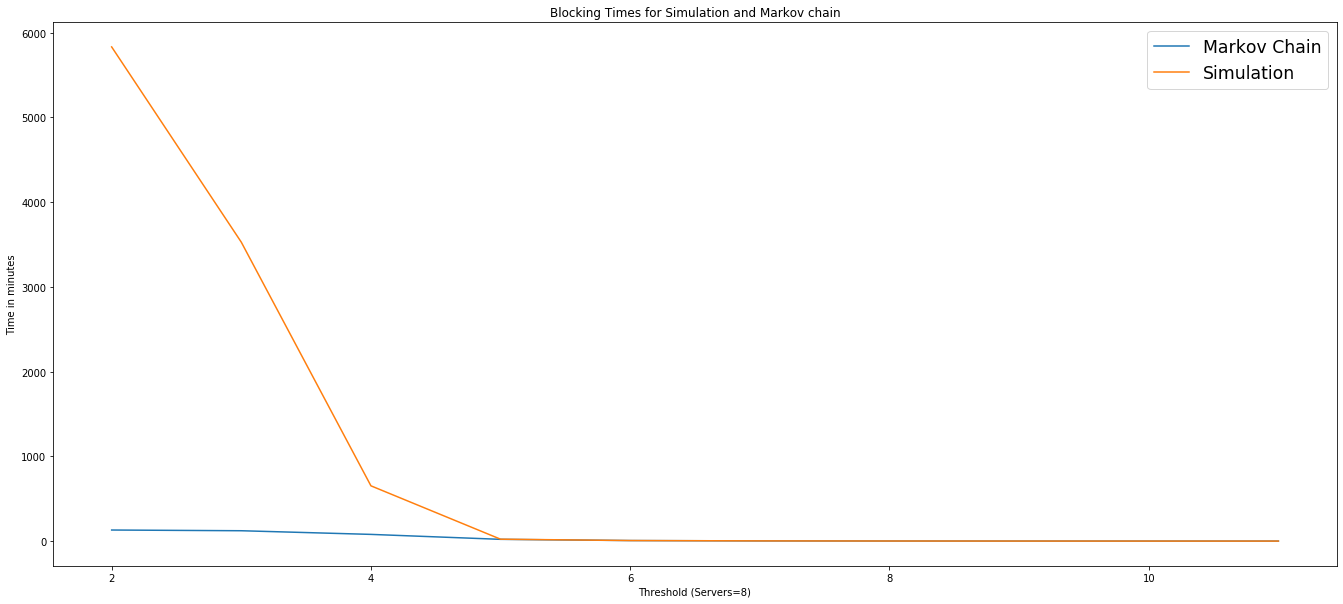

In [28]:
x_axis = np.linspace(2, 11, 10)
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_blocks_s)
plt.plot(x_axis, sim_blocks_s)
plt.title("Blocking Times for Simulation and Markov chain")
plt.xlabel("Threshold (Servers=8)")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

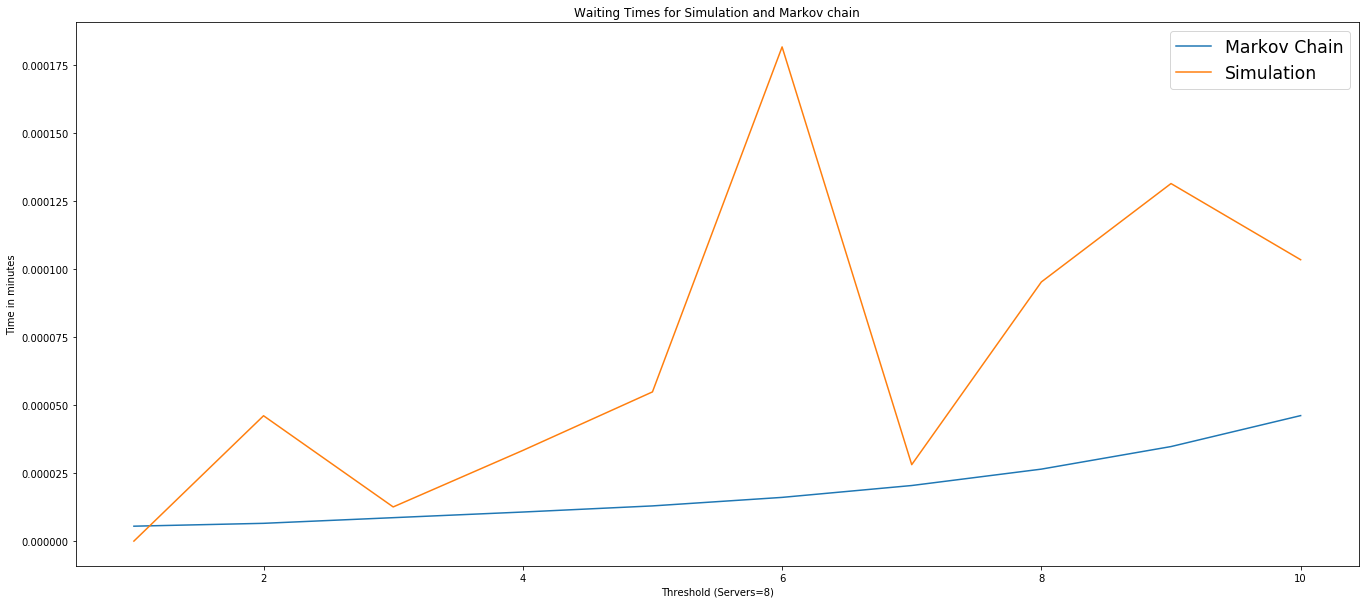

In [29]:
x_axis = np.linspace(1, 10, 10)
plt.figure(figsize=(23, 10))
plt.plot(x_axis, mar_waits_s)
plt.plot(x_axis, sim_waits_s)
plt.title("Waiting Times for Simulation and Markov chain")
plt.xlabel("Threshold (Servers=8)")
plt.ylabel("Time in minutes")
plt.legend(["Markov Chain", "Simulation"], fontsize="xx-large")

# Experiment with mean waiting time

In [118]:
# Parameters
lambda_a = 0.1
lambda_o = 0.2
mu = 0.1
num_of_servers = 6
threshold = 5
system_capacity = 10
parking_capacity = 10

In [119]:
def get_mean_waiting_time(pi, states, num_of_servers):
    states_np = np.array(states)
    indices = [index for index, (u,v) in enumerate(states_np) if v > num_of_servers]
    mean_waiting_time = np.sum([pi[i]/(-Q[i,i])  for i in indices])
    return mean_waiting_time

In [120]:
all_states = abg.markov.build_states(threshold, system_capacity, parking_capacity)
Q = abg.markov.get_transition_matrix(lambda_a, lambda_o, mu, num_of_servers, threshold, system_capacity, parking_capacity)
pi = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.lstsq)

In [121]:
get_mean_waiting_time(pi, all_states, num_of_servers)

0.025720885027281377

In [122]:
res = abg.simulation.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=100, output_type=output_type, runtime=runtime, system_capacity=system_capacity, parking_capacity=parking_capacity)
sim_mean_block = np.mean([np.mean(b.blocking_times) for b in res])
sim_mean_wait = np.mean([np.mean(w.waiting_times) for w in res])

In [123]:
sim_mean_wait

0.11313923469416648

# Break-down of formula for mean waiting time

In [30]:
all_states = abg.markov.build_states(threshold=4, system_capacity=5, parking_capacity=5)

In [31]:
states_np = np.array(all_states)

In [32]:
states_np

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5]])

In [33]:
indices = [index for index, (u,v) in enumerate(all_states) if v>num_of_servers]

In [34]:
indices

[10, 11, 12, 13, 14, 15]

In [35]:
states_np[indices][:,1]

array([5, 5, 5, 5, 5, 5])

In [36]:
states_np[indices][:,1] - num_of_servers

array([1, 1, 1, 1, 1, 1])

In [37]:
(states_np[indices][:,1] - num_of_servers) / (mu * num_of_servers)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [ ]:
pi[indices]

In [ ]:
((states_np[indices][:,1] - num_of_servers) / (mu * num_of_servers)) * pi[indices]

In [ ]:
np.sum(((states_np[indices][:,1] - num_of_servers) / (mu * num_of_servers)) * pi[indices])